In [1]:
import tensorflow as tf

C:\Users\chand\AppData\Roaming\Python\Python37\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\chand\AppData\Roaming\Python\Python37\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\chand\AppData\Roaming\Python\Python37\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  stacklevel=1)


# image_dataset_from_directory 

In [25]:
image_height = 256
image_width = 256 
batch_size = 32 

In [26]:
ds_training = tf.keras.preprocessing.image_dataset_from_directory(
    "../inputs/flower_photos", 
    labels = 'inferred',
    label_mode = "categorical",
    batch_size = batch_size,
    color_mode= "rgb", 
    image_size = (image_height, image_width), 
    shuffle = True,  
    seed =  10, 
    validation_split = 0.1, 
    subset="training"
    
)

Found 3670 files belonging to 5 classes.
Using 3303 files for training.


In [27]:
class_names = ds_training.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


In [94]:
ds_training

<BatchDataset shapes: ((None, 256, 256, 3), (None, 5)), types: (tf.float32, tf.float32)>

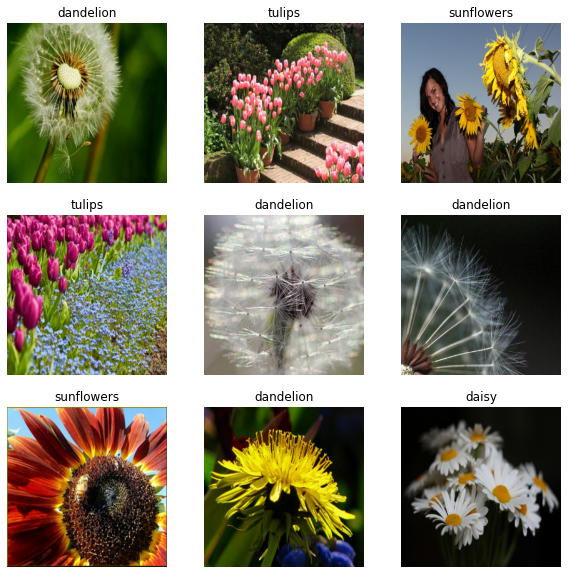

In [28]:
import matplotlib.pyplot as plt
import numpy as np 

plt.figure(figsize=(10, 10))
for images, labels in ds_training.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[np.argmax(labels[i])])
    plt.axis("off")

# ImageDataGenerator flow_from_directory both train and val in same directory

In [29]:
train_dir = "../inputs/flower_photos"

image_height = 256
image_width = 256 
batch_size = 32 

train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2) # set validation split

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(image_height, image_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='training') # set as training data

validation_generator = train_datagen.flow_from_directory(
    train_dir, # same directory as training data
    target_size=(image_height, image_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation') # set as validation data


Found 2939 images belonging to 5 classes.
Found 731 images belonging to 5 classes.


In [41]:
classes = train_generator.class_indices

In [46]:
classname_map = {}
for key in classes.keys():
    classname_map[classes[key]] = key 

In [47]:
classname_map

{0: 'daisy', 1: 'dandelion', 2: 'roses', 3: 'sunflowers', 4: 'tulips'}

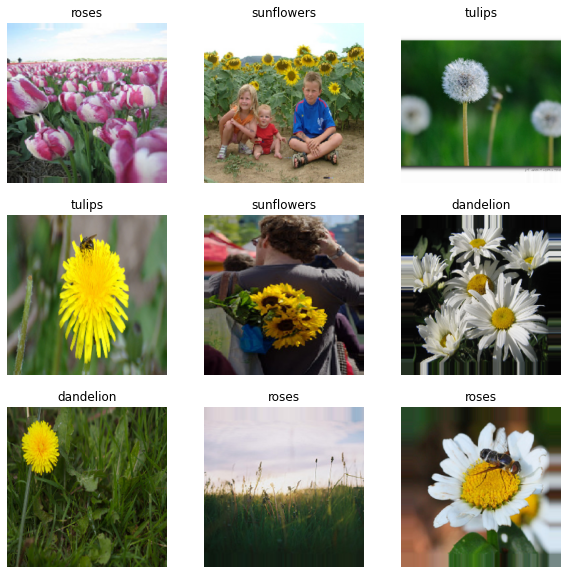

In [54]:
import matplotlib.pyplot as plt
import numpy as np 

plt.figure(figsize=(10, 10))
images, lables = train_generator.next()
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(images[i])
  plt.title(classname_map[int(labels[i])])
  plt.axis("off")

# Creating CSV to load from CSV

In [122]:
import pandas as pd 
import os 
path = "../inputs/flower_photos"
main_folder = os.listdir(path)

filename = [] 
label = []
for name in main_folder:
    file_path = os.path.join(path, name)
    file_name = os.listdir(file_path)
    for file in file_name:
        filename.append(file)
        label.append(name)

file_dict = {
    "id": filename, 
    "label": label 
}    
data = pd.DataFrame(
        file_dict, index=None
)

In [123]:
data.head()

,id,label
0,100080576_f52e8ee070_n.jpg,daisy
1,10140303196_b88d3d6cec.jpg,daisy
2,10172379554_b296050f82_n.jpg,daisy
3,10172567486_2748826a8b.jpg,daisy
4,10172636503_21bededa75_n.jpg,daisy


In [124]:
data = data.sample(frac=1).reset_index(drop=True)

In [125]:
data.head()

,id,label
0,7551637034_55ae047756_n.jpg,images
1,6280787884_141cd7b382_n.jpg,roses
2,18243351371_5fda92ac0a_n.jpg,images
3,7012364067_5ffc7654c9_m.jpg,sunflowers
4,5073473370_bdbb5a99fc.jpg,roses


# flow_from_dataframe

In [61]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
                                        rescale=1./255.,validation_split=0.25
                                        )

train_generator=datagen.flow_from_dataframe(
                                        dataframe=data,
                                        directory="../inputs/flower_photos/images",
                                        x_col="id",
                                        y_col="label",
                                        subset="training",
                                        batch_size=batch_size,
                                        seed=42,
                                        shuffle=True,
                                        class_mode="categorical",
                                        target_size=(image_height,image_width)
                                        )

valid_generator=datagen.flow_from_dataframe(
                                        dataframe=data,
                                        directory="../inputs/flower_photos/images",
                                        x_col="id",
                                        y_col="label",
                                        subset="validation",
                                        batch_size=32,
                                        seed=42,
                                        shuffle=True,
                                        class_mode="categorical",
                                        target_size=(image_height,image_width)
                                        )

Found 2753 validated image filenames belonging to 5 classes.
Found 917 validated image filenames belonging to 5 classes.


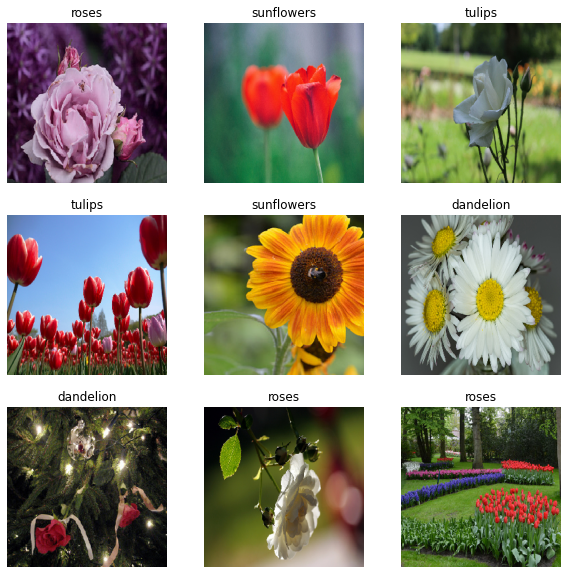

In [62]:
import matplotlib.pyplot as plt
import numpy as np 

plt.figure(figsize=(10, 10))
images, lables = valid_generator.next()
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(images[i])
  plt.title(classname_map[int(labels[i])])
  plt.axis("off")